# **Pre-trained model for Cats-vs-Dogs (Model name - VGG16)**

# **Problem Statement:**

The categorization of images into distinct classes is a pervasive task in computer
vision, and it has a wide array of applications, including in pet identification and
animal monitoring systems. In this assignment, we aim to develop a model
capable of accurately distinguishing between cat and dog images. Instead of
building a convolutional neural network (CNN) from scratch, we will leverage
transfer learning using the VGG16 model, a pre-trained model on the ImageNet
dataset. VGG16 is renowned for its effectiveness in image recognition tasks, but
it does not have broad categories for cats and dogs. Therefore, we will utilize the
convolutional (Conv) layers of VGG16 for feature extraction and add custom fully
connected (Cat) layers for the classification task.

**Objectives:**

**Utilize VGG16 for Feature Extraction:**

● Employ the VGG16 model, excluding its top layers, to serve as a feature
extractor for cat and dog images.

● Ensure the input images are of the correct size (150x150) and preprocessed
appropriately to match VGG16’s requirements.

**Data Preprocessing and Augmentation:**

Implement image data generators for real-time data augmentation, ensuring a
robust and varied dataset for training the classification layers.

**Build and Train the Classification Model:**

● Add custom fully connected layers on top of the VGG16 model for the
classification task.

● Freeze the convolutional layers of VGG16 to retain the pre-trained features
and only train the added classification layers.

**Model Compilation and Training:**

● Compile the model using stochastic gradient descent, categorical
cross-entropy as the loss function, and accuracy as the evaluation metric.

● Train the model using the training data, and validate its performance using
a validation set.

**Evaluate and Test the Model:**

● Assess the model’s performance based on its accuracy in classifying
images into cat or dog categories.

● Implement a prediction function to classify new images, providing the
predicted category and the associated confidence level


# What is VGG16 ?

The VGG-16 model is a convolutional neural network (CNN) architecture that was proposed by the Visual Geometry Group (VGG) at the University of Oxford. It is characterized by its depth, consisting of 16 layers, including 13 convolutional layers and 3 fully connected layers. VGG-16 is renowned for its simplicity and effectiveness, as well as its ability to achieve strong performance on various computer vision tasks, including image classification and object recognition. The model’s architecture features a stack of convolutional layers followed by max-pooling layers, with progressively increasing depth. This design enables the model to learn intricate hierarchical representations of visual features, leading to robust and accurate predictions. Despite its simplicity compared to more recent architectures, VGG-16 remains a popular choice for many deep learning applications due to its versatility and excellent performance.

# VGG16 Architecture -

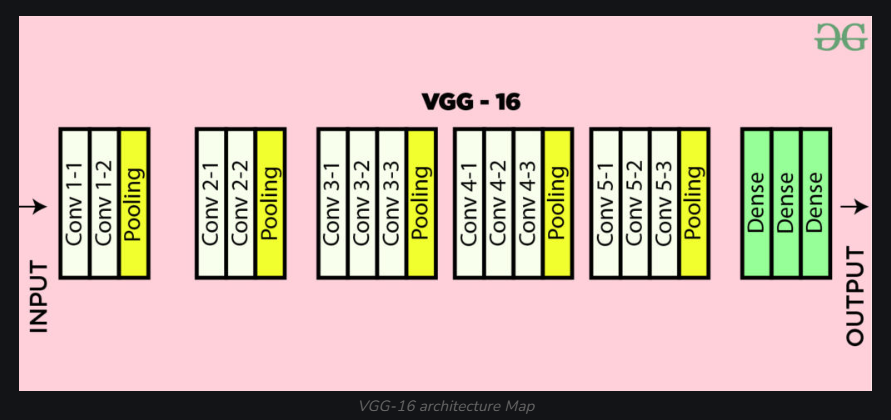

# Installing Packages and Libraries

In [228]:
! pip install Pillow

In [229]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential,Model
from keras.layers import Flatten,Dense,Dropout

# Unzipping the dataset

In [230]:
import zipfile

directory = '/content/drive/MyDrive/dogs_vs_cats.zip'    # stored dataset in google drive

unzip_train = zipfile.ZipFile(directory,'r')
unzip_train.extractall()
print("unzipped is successful")
unzip_train.close()

unzipped is successful


# Creating directories and dataframe

In [231]:
train_dog_dir = 'dogs_vs_cats/train/dogs'
train_cat_dir = 'dogs_vs_cats/train/cats'
test_dog_dir = 'dogs_vs_cats/test/dogs'
test_cat_dir = 'dogs_vs_cats/test/cats'

filenames_dog_train = os.listdir(train_dog_dir)
filenames_cat_train = os.listdir(train_cat_dir)
filenames_dog_test = os.listdir(test_dog_dir)
filenames_cat_test = os.listdir(test_cat_dir)

data = pd.DataFrame({'dog_train' : filenames_dog_train, 'cat_train': filenames_cat_train})
data.head()

data_test = pd.DataFrame({'dog_test' : filenames_dog_test, 'cat_test' : filenames_cat_test})
data_test.head()

,dog_test,cat_test
0,dog.10152.jpg,cat.11071.jpg
1,dog.3908.jpg,cat.9812.jpg
2,dog.9325.jpg,cat.3414.jpg
3,dog.5475.jpg,cat.9541.jpg
4,dog.7078.jpg,cat.2429.jpg


# Visualization of dogs

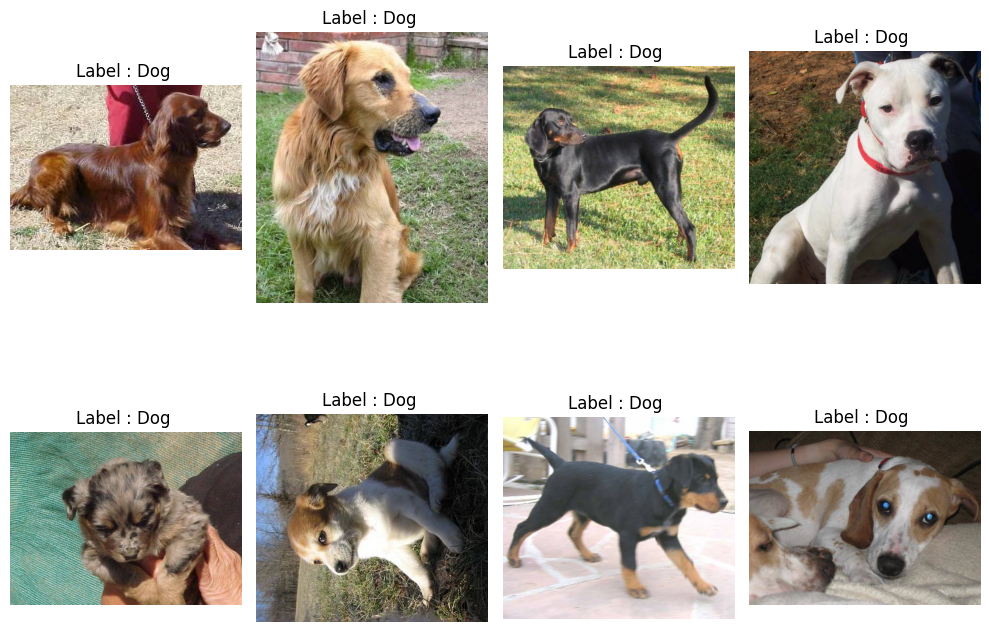

In [232]:
plt.figure(figsize=(10,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    image_path = 'dogs_vs_cats' + '/train' + '/dogs/' + str(data['dog_train'][i])
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Label : Dog ")
    plt.axis('off')
plt.tight_layout()
plt.show()

# visualization of Cats

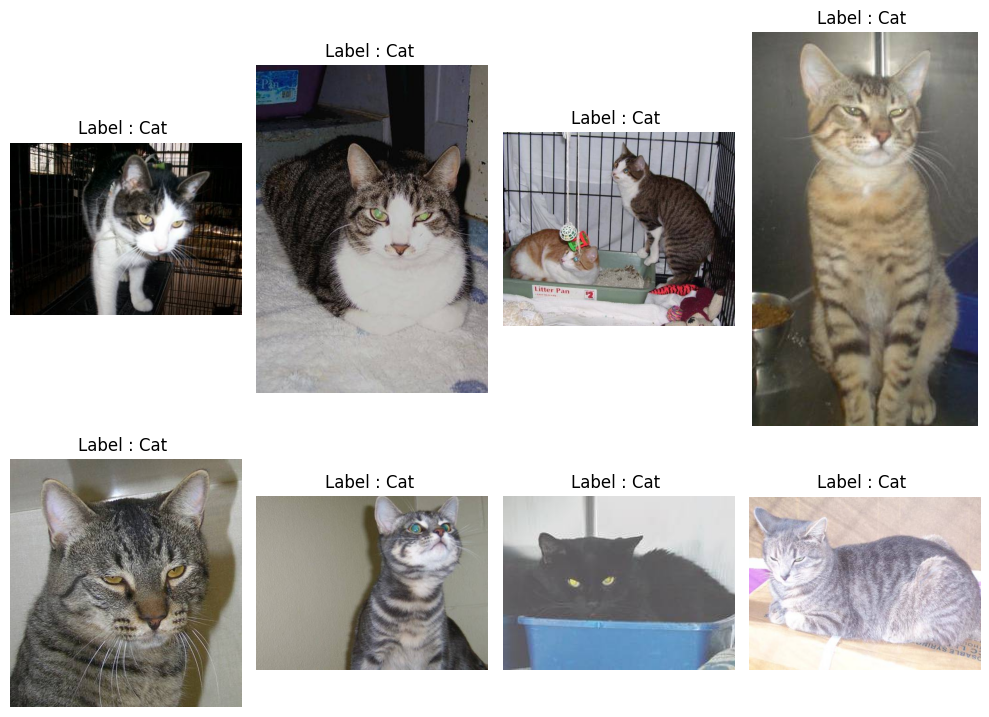

In [233]:
plt.figure(figsize=(10,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    image_path = 'dogs_vs_cats' + '/train' + '/cats/' + str(data['cat_train'][i])
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Label : Cat ")
    plt.axis('off')
plt.tight_layout()
plt.show()

# using ImageDataGenerator of VGG16

In [234]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

# Splitting into training and testing set

In [235]:
train_dir = 'dogs_vs_cats/train'
test_dir = 'dogs_vs_cats/test'

training_set = image_data_generator.flow_from_directory(directory=train_dir,
                                                    batch_size=32,
                                                    target_size=(150,150),
                                                    class_mode='categorical')


testing_set = image_data_generator.flow_from_directory(directory=test_dir,
                                                    batch_size=32,
                                                    shuffle=False,
                                                    target_size=(150,150),
                                                    class_mode='categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# DeepLearning Model - pre-trained model (VGG16)

In [236]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(150,150,3))

for layer in vgg16_model.layers:
    layer.trainable=False

In [237]:
vgg16_model.input , vgg16_model.outputs

(<KerasTensor shape=(None, 150, 150, 3), dtype=float32, sparse=False, name=keras_tensor_116>,
 [<KerasTensor shape=(None, 4, 4, 512), dtype=float32, sparse=False, name=keras_tensor_134>])

# Final Model

In [238]:
flat = tf.keras.layers.Flatten() (vgg16_model.output)
dropout1 = tf.keras.layers.Dropout(0.20, name="Droput_01") (flat)
dense1 = tf.keras.layers.Dense(128,activation='relu') (dropout1)
dropout2 = tf.keras.layers.Dropout(0.20, name="Dropout_02") (dense1)
output = tf.keras.layers.Dense(2,activation='softmax') (dropout2)

final_model = tf.keras.models.Model(inputs=[vgg16_model.input], outputs=[output])

# Model Compile

In [242]:
final_model.compile(optimizer='adam',
                    loss=tf.keras.losses.categorical_crossentropy,
                    metrics=['accuracy'])

# Callbacks for overfitting and overtraining

In [243]:
learning_rate = ReduceLROnPlateau(monitor='val_accuracy',patience=2,
                                  factor=0.50, min_lr=0.00001,
                                  verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',patience=5,
                               restore_best_weights=True, verbose=0)

# Model Fit

In [244]:
history = final_model.fit(training_set,
                          validation_data=testing_set,
                          epochs=20,
                          callbacks=[learning_rate,early_stopping])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 128ms/step - accuracy: 0.9313 - loss: 1.4669 - val_accuracy: 0.9662 - val_loss: 0.0950 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9745 - loss: 0.0811 - val_accuracy: 0.9642 - val_loss: 0.1077 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9783 - loss: 0.0715 - val_accuracy: 0.9696 - val_loss: 0.0848 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.9844 - loss: 0.0445 - val_accuracy: 0.9696 - val_loss: 0.1167 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9837 - loss: 0.0441
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9837 - loss: 0.0442 - val_accuracy: 0.9676 - val_loss: 0.1065 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.988

# Visualize the Val_Loss and Val_Accuracy

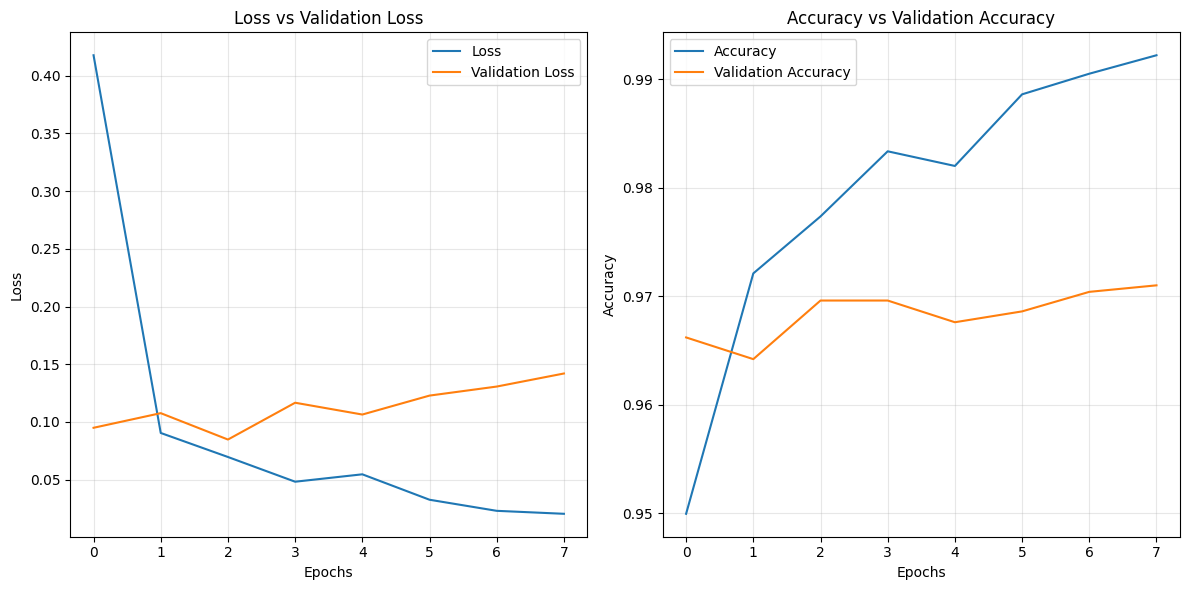

In [245]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.30)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.30)
plt.tight_layout()
plt.show()

# Model Evaluate

In [246]:
loss, accuracy = final_model.evaluate(testing_set)
print(f"Accuracy of VGG16 Model on testing_set : {accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.9778 - loss: 0.0719
Accuracy of VGG16 Model on testing_set : 0.9696000218391418


In [247]:
losst, accuracyt = final_model.evaluate(training_set)
print(f"Accuracy of VGG16 Model on training_set : {accuracyt}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.9897 - loss: 0.0327
Accuracy of VGG16 Model on training_set : 0.9903500080108643


# Prediction

In [248]:
pred = final_model.predict(testing_set)
results = np.argmax(pred, axis=1)

# creating a data frame
prediction_df = pd.DataFrame({'filename' : testing_set.filenames, 'prediction' : results})
prediction_df.head()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_116']
Received: inputs=Tensor(shape=(32, 150, 150, 3))
  warnings.warn(msg)


157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step


,filename,prediction
0,cats/cat.10.jpg,0
1,cats/cat.10000.jpg,0
2,cats/cat.10001.jpg,0
3,cats/cat.10007.jpg,0
4,cats/cat.10017.jpg,0


# function for predicting from dataframe (data_test)

In [261]:
def predicted(data_test):
    abcd = str(data_test)
    what = abcd.split('.')
    image_path = None
    files = None
    if what[0]=='dog':
        image_path = 'dogs_vs_cats/test/dogs'
        files = 'dogs/' + abcd
    else:
      image_path = 'dogs_vs_cats/test/cats'
      files = 'cats/' + abcd
    image_path = image_path + '/' + abcd
    image = image_path
    img = load_img(image, target_size=(150,150))
    plt.imshow(img)
    plt.tight_layout()
    plt.axis('off')
    plt.show()
    ac = prediction_df[prediction_df['filename']==files]['prediction'].values
    if ac==0:
         print(f"\n\n--------------------Predicted Label : Cat------------------------")
    elif ac>0:
      print(f"\n\n-----------------------Predicted Label : Dog-------------------------")

In [262]:
# test dataframe
data_test.head(10)

,dog_test,cat_test
0,dog.10152.jpg,cat.11071.jpg
1,dog.3908.jpg,cat.9812.jpg
2,dog.9325.jpg,cat.3414.jpg
3,dog.5475.jpg,cat.9541.jpg
4,dog.7078.jpg,cat.2429.jpg
5,dog.1780.jpg,cat.475.jpg
6,dog.475.jpg,cat.236.jpg
7,dog.9528.jpg,cat.8501.jpg
8,dog.11586.jpg,cat.4675.jpg
9,dog.5456.jpg,cat.9078.jpg


take test_data in the format of dataframe to predict

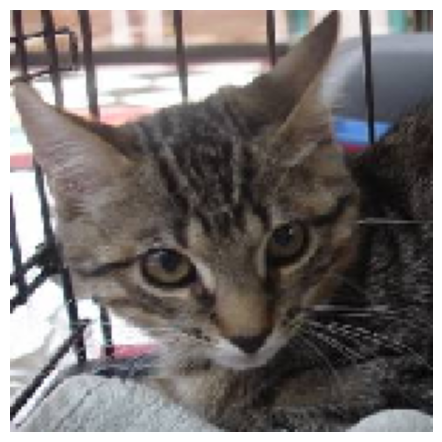



--------------------Predicted Label : Cat------------------------


In [263]:
predicted(data_test['cat_test'][150])